In [11]:
import tensorflow as tf
from tensorflow.keras import Model

In [7]:
from tensorflow.keras.datasets import cifar10

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape for CIFAR-10 images (32x32 pixels, 3 color channels)
input_shape = x_train.shape[1:]

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.2788 - loss: 1.9176 - val_accuracy: 0.4608 - val_loss: 1.4694
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.4766 - loss: 1.4479 - val_accuracy: 0.5802 - val_loss: 1.1995
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5465 - loss: 1.2711 - val_accuracy: 0.6066 - val_loss: 1.0942
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5871 - loss: 1.1727 - val_accuracy: 0.6324 - val_loss: 1.0417
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6138 - loss: 1.0994 - val_accuracy: 0.6344 - val_loss: 1.0240
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6355 - loss: 1.0375 - val_accuracy: 0.6686 - val_loss: 0.9533
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6571 - loss: 0.9840 - val_accuracy: 0.6870 - val_loss: 0.9094
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6692 -

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 5s - 16ms/step - accuracy: 0.6974 - loss: 0.8939
Test loss: 0.8939
Test accuracy: 0.6974


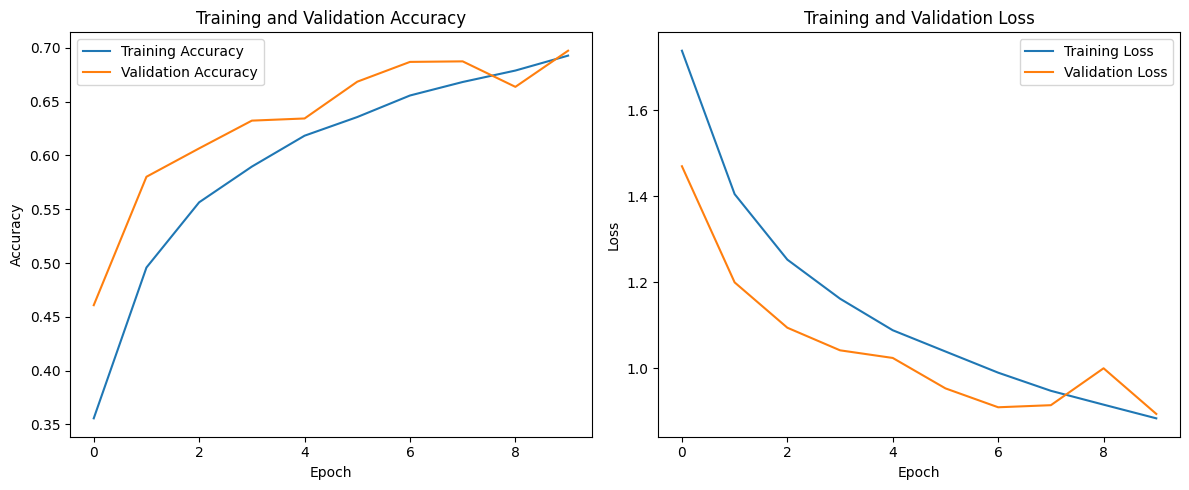

In [13]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot for Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define CIFAR-10 class names for better readability
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select a random image from the test set
# You can change the index to pick a specific image
img_index = np.random.randint(0, len(x_test))
single_image = x_test[img_index]
true_label_one_hot = y_test[img_index]

# The model expects a batch of images, so we need to add an extra dimension
# Reshape from (32, 32, 3) to (1, 32, 32, 3)
image_for_prediction = np.expand_dims(single_image, axis=0)

print(f"Selected image index: {img_index}")
print(f"True label (one-hot encoded): {true_label_one_hot}")


Selected image index: 817
True label (one-hot encoded): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
# Make a prediction
predictions = model.predict(image_for_prediction)

# Get the predicted class (index with the highest probability)
predicted_class_index = np.argmax(predictions[0])
true_class_index = np.argmax(true_label_one_hot)

print(f"Predicted probabilities: {predictions[0]}")
print(f"Predicted class index: {predicted_class_index} ({class_names[predicted_class_index]})")
print(f"True class index: {true_class_index} ({class_names[true_class_index]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted probabilities: [4.2084864e-04 1.9467841e-05 2.8241692e-02 5.6099188e-01 2.9682674e-02
 3.5646242e-01 1.2647426e-02 1.1307174e-02 1.3249322e-04 9.3933573e-05]
Predicted class index: 3 (cat)
True class index: 5 (dog)


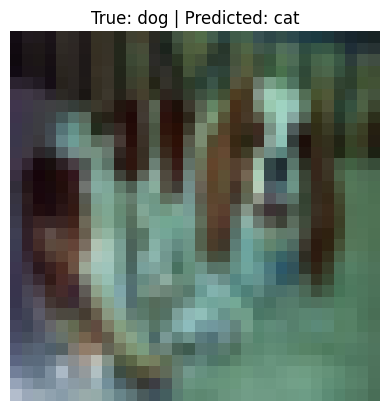

In [18]:
# Display the image
plt.imshow(single_image)
plt.title(f"True: {class_names[true_class_index]} | Predicted: {class_names[predicted_class_index]}")
plt.axis('off')
plt.show()